In [130]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
# Load data set for NYC Public School Regents for the school years 2014-15 to 2016-17
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', index_col=0)

In [132]:
print("Column Names:")
print(df.columns)

Column Names:
Index(['School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested',
       'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65',
       'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
       'Number Scoring CR', 'Percent Scoring CR'],
      dtype='object')


In [133]:
# Display the top 5 records
df.head()

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [134]:
#Code to convert non numeric values to NaN
df['Mean Score'] = pd.to_numeric(df['Mean Score'], errors='coerce')

In [135]:
# Removing missing values from the Mean Score column
df = df.dropna(subset=['Mean Score'])

In [136]:
# Calculating the school average for each school
school_avg = df.groupby(['School Name'])['Mean Score'].mean().round(2).sort_values(ascending=False)
print("Top 10 schools by average score")
print(school_avg.head(10))

Top 10 schools by average score
School Name
Stuyvesant High School                               91.70
J.H.S. 185 Edward Bleeker                            91.69
The Anderson School                                  91.36
The Christa McAuliffe School\I.S. 187                90.97
East Side Middle School                              90.41
J.H.S. 074 Nathaniel Hawthorne                       90.24
Bronx High School of Science                         90.19
New York City Lab Middle School for Collaborative    90.16
J.H.S. 167 Robert F. Wagner                          89.87
Townsend Harris High School                          89.70
Name: Mean Score, dtype: float64


In [137]:
# Caluculating the average scoore by Regents Exam
exam_avg = df.groupby(['Regents Exam'])['Mean Score'].mean().round(2).sort_values(ascending=False)
print("Average Score by Regents Exam:")
print(exam_avg)

Average Score by Regents Exam:
Regents Exam
U.S. History and Government        71.08
Common Core English                70.38
Living Environment                 69.06
Common Core Algebra                67.49
Physical Settings/Physics          66.55
English                            65.77
Integrated Algebra                 64.81
Global History and Geography       64.17
Physical Settings/Chemistry        64.14
Common Core Algebra2               63.59
Physical Settings/Earth Science    63.55
Geometry                           61.88
Common Core Geometry               59.11
Algebra2/Trigonometry              56.37
Name: Mean Score, dtype: float64


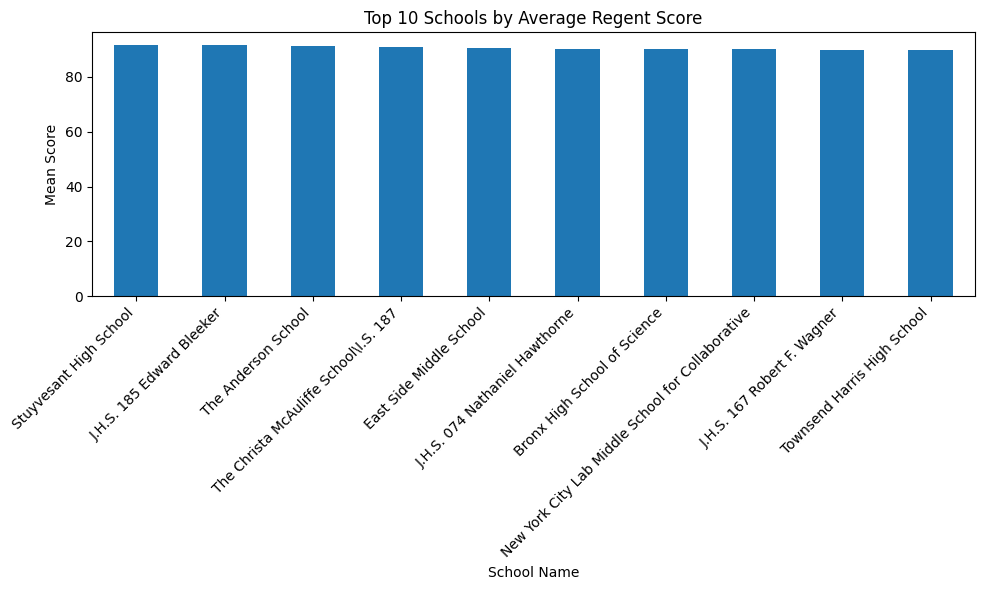

In [138]:
# Bar chart of top 10 shcools by average scores
plt.figure(figsize=(10, 6))
school_avg.head(10).plot(kind='bar')
plt.title('Top 10 Schools by Average Regent Score')
plt.xlabel('School Name')
plt.ylabel('Mean Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

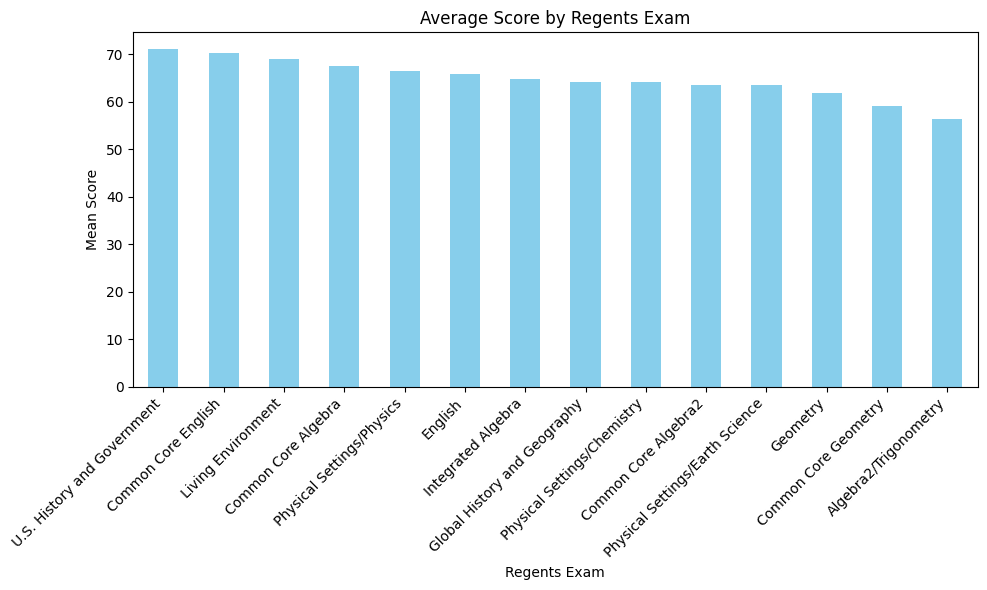

In [139]:
# Bar chart of average scores by exam
plt.figure(figsize=(10, 6))
exam_avg.plot(kind='bar', color='skyblue')
plt.title('Average Score by Regents Exam')
plt.xlabel('Regents Exam')
plt.ylabel('Mean Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [140]:
# Filtering for U.S. History and Government Regents Exam
exam_name = 'U.S. History and Government'
exam_data = df[df['Regents Exam'] == exam_name]

In [141]:
# Calculating the Average Score for the U.S. History and Government Regents Exam by school
school_exam_avg = exam_data.groupby(['School Name'])['Mean Score'].mean().round(2).sort_values(ascending=False).head(10)

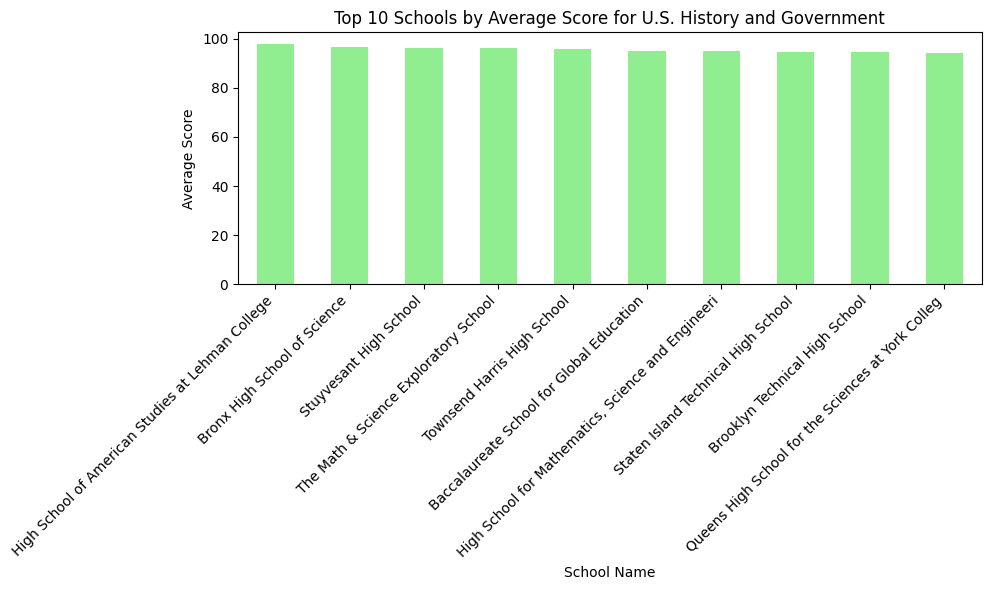

In [142]:
# Ploting
plt.figure(figsize=(10,6))
school_exam_avg.plot(kind='bar', color='lightgreen')
plt.title(f'Top 10 Schools by Average Score for {exam_name}')
plt.xlabel('School Name')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [143]:
# Filtering for Algebra2/Trigonometry Regents Exam
exam_name2 = 'Algebra2/Trigonometry'
exam_data2 = df[df['Regents Exam'] == exam_name2]

In [144]:
# Calculating the Average Score for the Algebra2/Trigonometry Regents Exam by school
school_exam_avg2 = exam_data2.groupby(['School Name'])['Mean Score'].mean().round(2).sort_values(ascending=False).head(10)

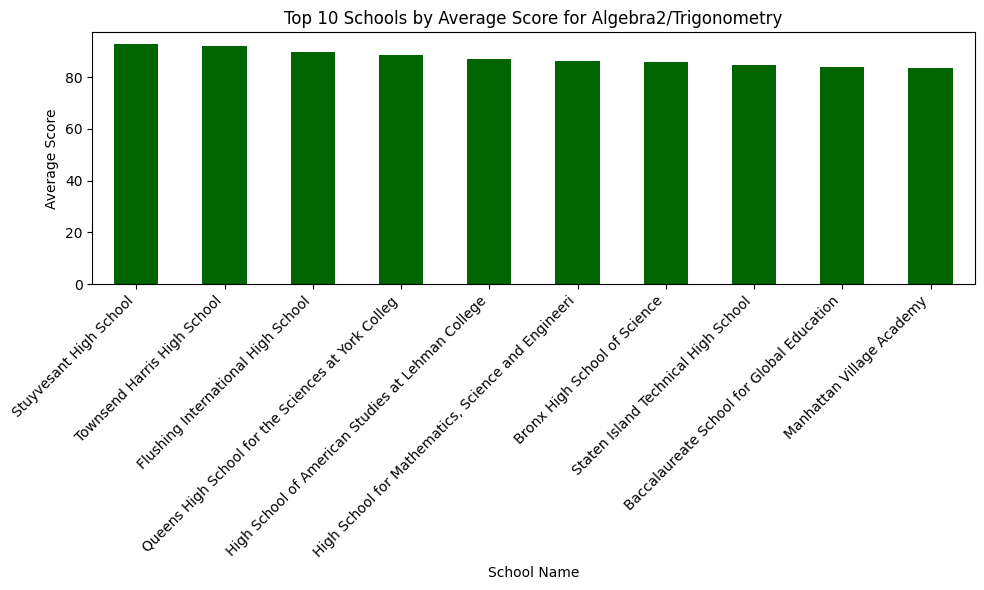

In [145]:
# Ploting
plt.figure(figsize=(10,6))
school_exam_avg2.plot(kind='bar', color='darkgreen')
plt.title(f'Top 10 Schools by Average Score for {exam_name2}')
plt.xlabel('School Name')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [146]:
print("Conclusion:\n\nWhen looking at the average score by school.  Stuyvesant High School came on fist place.\n")
print("Also, when looking at the average score by by Exam, Algebra2/Trigonometry was the Exam with the lowest score; However when looking at the Algebra2/Trigonometry Exam score by school, \nStuyvesant High School came first.\n")
print("U.S. History and Government was the Regents Exam with the higest score, when reviewing the data we can see that Stuyvesant High School came within the top three highest average score.  \nThis coincides with Stuyvesant High School being the school with the highest average.")

Conclusion:

When looking at the average score by school.  Stuyvesant High School came on fist place.

Also, when looking at the average score by by Exam, Algebra2/Trigonometry was the Exam with the lowest score; However when looking at the Algebra2/Trigonometry Exam score by school, 
Stuyvesant High School came first.

U.S. History and Government was the Regents Exam with the higest score, when reviewing the data we can see that Stuyvesant High School came within the top three highest average score.  
This coincides with Stuyvesant High School being the school with the highest average.
